In [ ]:
# Importing Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Loading dataset
df = pd.read_csv('/content/StudentsPerformance.csv')

In [ ]:
# Displaying first few rows
print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [ ]:
# Checking data info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


In [ ]:
# Checking for missing values
print(df.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [ ]:
# Label encoding categorical features
label_cols = ['gender', 'race/ethnicity', 'parental level of education',
              'lunch', 'test preparation course']

In [ ]:
df_encoded = df.copy()
le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [ ]:
# Optionally creating a target variable
df_encoded['average_score'] = df_encoded[['math score', 'reading score', 'writing score']].mean(axis=1)

In [ ]:
# Features and Target
X = df_encoded.drop(['math score', 'reading score', 'writing score', 'average_score'], axis=1)
y = df_encoded['average_score']

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

In [ ]:
# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [ ]:
# Decision Tree Evaluation
print("Decision Tree R² Score:", round(r2_score(y_test, dt_pred),2))
print("Decision Tree MSE:", round(mean_squared_error(y_test, dt_pred),2))

Decision Tree R² Score: -0.09
Decision Tree MSE: 234.36


In [ ]:
# Random Forest Evaluation
print("Random Forest R² Score:", round(r2_score(y_test, rf_pred),2))
print("Random Forest MSE:", round(mean_squared_error(y_test, rf_pred),2))

Random Forest R² Score: -0.03
Random Forest MSE: 220.5


In [ ]:
# Ploting feature importances for Random Forest
importances = rf_model.feature_importances_
features = X.columns

In [ ]:
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df = feature_df.sort_values('Importance', ascending=False)

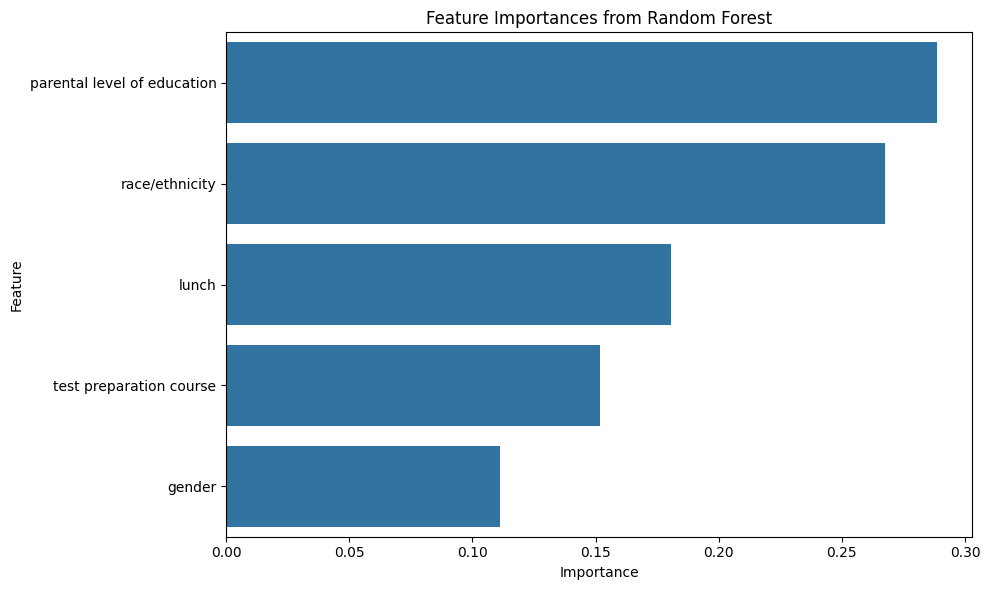

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_df, x='Importance', y='Feature')
plt.title('Feature Importances from Random Forest')
plt.tight_layout()
plt.show()